# Results on ENCODE ChIP-seq data using JASPAR2014 binding profiles for ChIP'ed TFs
1st and 2nd order DNA shape features were used. PSSMs were optimized using DiMO.

## Data sets

In [1]:
%config InlineBackend.figure_formats=['svg']
%matplotlib inline
from matplotlib.pyplot import savefig
import pandas as pd
import numpy as np
data = pd.read_csv("../data/20150317/wgEncodeAwgTfbs_with_JASPAR_MA.csv", header=0, index_col=0,
                  names=["ENCODE_data_set", "TF_name", "JASPAR_id"])
print "{0:d} ENCODE experiments are considered here (i.e. associated to a JASPAR profile).".format(len(data))
print "It corresponds to {0:d} different TFs.".format(len(set(data["TF_name"])))

400 ENCODE experiments are considered here (i.e. associated to a JASPAR profile).
It corresponds to 76 different TFs.


In [2]:
from Bio.motifs.jaspar.db import JASPAR5
jdb = JASPAR5(host="vm5.cmmt.ubc.ca", name="JASPAR_2014", user="jaspar_r", password="")

In [3]:
def get_tf_family(jasparid):
    motif = jdb.fetch_motif_by_id(jasparid)
    return motif.tf_family

In [4]:
data["TF_family"] = data["JASPAR_id"].map(get_tf_family)

In [5]:
def rename_tf_fam(name):
    if name == "BetaBetaAlpha-zinc finger":
        return "BetaBetaAlpha-zinc Finger"
    elif name == "Ets":
        return "ETS"
    elif name == "Homeo":
        return "Homeodomain"
    elif name == "Leucine-Zipper":
        return "Leucine Zipper"
    elif name == "NF-Y CCAAT-Binding":
        return "NFY CCAAT-binding"
    else:
        return name

In [6]:
print "The number of ChIP-seq experiments associated to each TF family is given below:"
families = {}
for family in data["TF_family"].map(rename_tf_fam):
    if family in families:
        families[family]["all TFs # occurences"] += 1
    else:
        families[family] = {}
        families[family]["all TFs # occurences"] = 1
all_tf_fam_df = pd.DataFrame.from_dict(families, orient='index')
all_tf_fam_df.sort("all TFs # occurences", ascending=False)

The number of ChIP-seq experiments associated to each TF family is given below:


,all TFs # occurences
BetaBetaAlpha-zinc Finger,146
Helix-Loop-Helix,56
Leucine Zipper,55
ETS,21
Stat,13
GATA,12
Rel,10
E2F,10
High Mobility Group (Box),8
Forkhead,8


In [7]:
print "TFs are coming from {0:d} different TF families.".format(len(families))

TFs are coming from 24 different TF families.


In [8]:
def auc_val(inline):
    return eval(inline.split(' ')[-1])

import os
for repo in os.listdir('./'):
    if repo.startswith('wgEncodeAwgTfbs'):
        res_file = '{0}/predictions_results.txt'.format(repo)
        if os.path.isfile(res_file):
            with open(res_file) as stream:
                first_line = stream.readline()
                assert first_line.startswith('ROC AUC TFFM+DNAshape')
                data.loc[repo, 'TFFM_dnashape_AUROC'] = auc_val(first_line)
                second_line = stream.readline()
                assert second_line.startswith('PR AUC TFFM+DNAshape')
                data.loc[repo, 'TFFM_dnashape_AUPRC'] = auc_val(second_line)
                third_line = stream.readline()
                assert third_line.startswith('ROC AUC TFFM')
                data.loc[repo, 'TFFM_AUROC'] = auc_val(third_line)
                fourth_line = stream.readline()
                assert fourth_line.startswith('PR AUC TFFM')
                data.loc[repo, 'TFFM_AUPRC'] = auc_val(fourth_line)
                fifth_line = stream.readline()
                assert fifth_line.startswith('ROC AUC PWM+DNAshape')
                data.loc[repo, 'PSSM_dnashape_AUROC'] = auc_val(fifth_line)
                sixth_line = stream.readline()
                assert sixth_line.startswith('PR AUC PWM+DNAshape')
                data.loc[repo, 'PSSM_dnashape_AUPRC'] = auc_val(sixth_line)
                seventh_line = stream.readline()
                assert seventh_line.startswith('ROC AUC PWM')
                data.loc[repo, 'PSSM_AUROC'] = auc_val(seventh_line)
                eighth_line = stream.readline()
                assert eighth_line.startswith('PR AUC PWM')
                data.loc[repo, 'PSSM_AUPRC'] = auc_val(eighth_line)
                data.loc[repo, 'TFFM_AUROC_improvement'] = data.loc[repo, 'TFFM_dnashape_AUROC'] - data.loc[repo, 'TFFM_AUROC']
                data.loc[repo, 'TFFM_AUPRC_improvement'] = data.loc[repo, 'TFFM_dnashape_AUPRC'] - data.loc[repo, 'TFFM_AUPRC']
                data.loc[repo, 'PSSM_AUROC_improvement'] = data.loc[repo, 'PSSM_dnashape_AUROC'] - data.loc[repo, 'PSSM_AUROC']
                data.loc[repo, 'PSSM_AUPRC_improvement'] = data.loc[repo, 'PSSM_dnashape_AUPRC'] - data.loc[repo, 'PSSM_AUPRC']
data.TF_family = data.TF_family.map(rename_tf_fam)

## TFFM analyses


### Results on all the ChIP-seq experiments

In [9]:
print "TFFM-based classifiers have higher AUROC in {0:d} over {1:d} cases".format(
    len(data[data["TFFM_dnashape_AUROC"] > data["TFFM_AUROC"]]), len(data.dropna()))
print "TFFM-based classifiers have higher AUPRC in {0:d} over {1:d} cases".format(
    len(data[data["TFFM_dnashape_AUPRC"] > data["TFFM_AUPRC"]]), len(data.dropna()))

TFFM-based classifiers have higher AUROC in 399 over 400 cases
TFFM-based classifiers have higher AUPRC in 396 over 400 cases


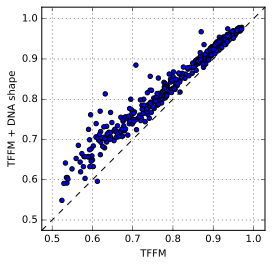

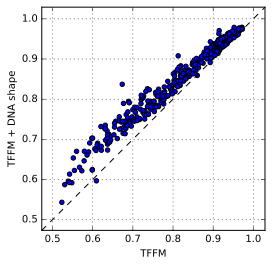

In [10]:
mini = min(min(data.dropna()["TFFM_AUROC"]), min(data.dropna()["TFFM_dnashape_AUROC"])) - 0.05
maxi = max(max(data.dropna()["TFFM_AUROC"]), max(data.dropna()["TFFM_dnashape_AUROC"])) + 0.05
axes = data.dropna().plot(x="TFFM_AUROC", y="TFFM_dnashape_AUROC", kind="scatter")
axes.set_xlabel("TFFM")
axes.set_ylabel("TFFM + DNA shape")
axes.plot((mini, maxi), (mini, maxi), 'k--')
axes.set_xlim(mini, maxi)
axes.set_ylim(mini, maxi)
axes.set_aspect('equal')
savefig("AUROC_TFFM_TFFM+DNAshape.svg")
mini = min(min(data.dropna()["TFFM_AUPRC"]), min(data.dropna()["TFFM_dnashape_AUPRC"])) - 0.05
maxi = max(max(data.dropna()["TFFM_AUPRC"]), max(data.dropna()["TFFM_dnashape_AUPRC"])) + 0.05
axes = data.dropna().plot(x="TFFM_AUPRC", y="TFFM_dnashape_AUPRC", kind="scatter")
axes.set_xlabel("TFFM")
axes.set_ylabel("TFFM + DNA shape")
axes.plot((mini, maxi), (mini, maxi), 'k--')
axes.set_xlim(mini, maxi)
axes.set_ylim(mini, maxi)
axes.set_aspect('equal')
savefig("AUPRC_TFFM_TFFM+DNAshape.svg")

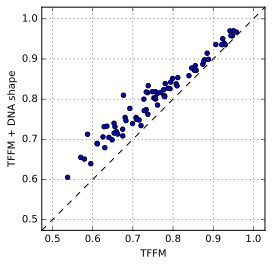

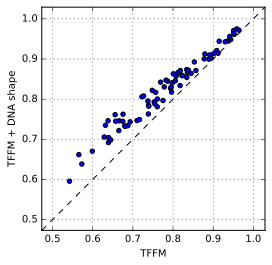

In [11]:
tf_dico = {'TF_name': [], 'TFFM_dnashape_AUROC': [], 'TFFM_AUROC': [],
           'TFFM_dnashape_AUPRC': [], 'TFFM_AUPRC': []}
for tf in list(set(data.TF_name)):
    tf_dico['TF_name'].append(tf)
    tf_dico['TFFM_dnashape_AUROC'].append(
        data.dropna().loc[data.TF_name == tf].TFFM_dnashape_AUROC.median())
    tf_dico['TFFM_AUROC'].append(
        data.dropna().loc[data.TF_name == tf].TFFM_AUROC.median())
    tf_dico['TFFM_dnashape_AUPRC'].append(
        data.dropna().loc[data.TF_name == tf].TFFM_dnashape_AUPRC.median())
    tf_dico['TFFM_AUPRC'].append(
        data.dropna().loc[data.TF_name == tf].TFFM_AUPRC.median())
data_tffm = pd.DataFrame(tf_dico)
axes = data_tffm.dropna().plot(x='TFFM_AUROC', y='TFFM_dnashape_AUROC', kind='scatter')
axes.set_xlabel("TFFM")
axes.set_ylabel("TFFM + DNA shape")
axes.plot((mini, maxi), (mini, maxi), 'k--')
axes.set_xlim(mini, maxi)
axes.set_ylim(mini, maxi)
axes.set_aspect('equal')
savefig('AUROC_TFFM_TFFM+DNAshape_perTF.svg')

axes = data_tffm.dropna().plot(x='TFFM_AUPRC', y='TFFM_dnashape_AUPRC', kind='scatter')
axes.set_xlabel("TFFM")
axes.set_ylabel("TFFM + DNA shape")
axes.plot((mini, maxi), (mini, maxi), 'k--')
axes.set_xlim(mini, maxi)
axes.set_ylim(mini, maxi)
axes.set_aspect('equal')
savefig('AUPRC_TFFM_TFFM+DNAshape_perTF.svg')

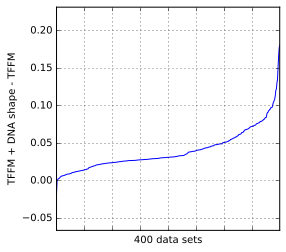

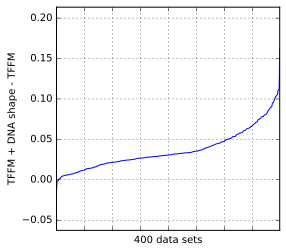

In [12]:
data = data.sort("TFFM_AUROC_improvement")
axes = data.dropna().plot(y="TFFM_AUROC_improvement", use_index=False, legend=False)
axes.tick_params(axis="x", labelbottom='off')
axes.set_xlabel("{0:d} data sets".format(len(data.dropna())))
axes.set_ylabel("TFFM + DNA shape - TFFM")
axes.set_ylim(min(data.TFFM_AUROC_improvement) - 0.05,
              max(data.TFFM_AUROC_improvement) + 0.05)
axes.set_aspect(1./axes.get_data_ratio())
savefig("AUROC_improvement_TFFM_TFFM+DNAshape.svg")

data = data.sort("TFFM_AUPRC_improvement")
axes = data.dropna().plot(y="TFFM_AUPRC_improvement", use_index=False, legend=False)
axes.tick_params(axis="x", labelbottom='off')
axes.set_xlabel("{0:d} data sets".format(len(data.dropna())))
axes.set_ylabel("TFFM + DNA shape - TFFM")
axes.set_ylim(min(data.TFFM_AUPRC_improvement) - 0.05,
              max(data.TFFM_AUPRC_improvement) + 0.05)
axes.set_aspect(1./axes.get_data_ratio())
savefig("AUPRC_improvement_TFFM_TFFM+DNAshape.svg")

In [13]:
print 'AUROC difference > 0.05 for {0:d} data sets'.format(
    len(data[data.TFFM_AUROC_improvement > 0.05]))
print 'AUPRC difference > 0.05 for {0:d} data sets'.format(
    len(data[data.TFFM_AUPRC_improvement > 0.05]))

AUROC difference > 0.05 for 103 data sets
AUPRC difference > 0.05 for 94 data sets


In [14]:
%load_ext rpy2.ipython

In [15]:
families_list = families.keys()

In [16]:
%%R -i data -i families_list -o families_mww
data = as.data.frame(data)
families_mww = data.frame(row.names=families_list)
for(family in families_list){
    inside = data[data['TF_family'] == family, 'TFFM_AUROC_improvement'];
    outside = data[data['TF_family'] != family, 'TFFM_AUROC_improvement'];
    mww = wilcox.test(inside, outside, alternative='g', exact=TRUE);
    families_mww[family, 'mww_pval'] = mww$p.value;
    families_mww[family, 'mww_corrected'] = mww$p.value * length(families_list);
    families_mww[family, 'family'] = family
}

In [17]:
families_mww_df = pd.DataFrame(families_mww[['mww_pval', 'mww_corrected']])
families_mww_df.index = families_list
families_mww_df.sort('mww_corrected')

,mww_pval,mww_corrected
E2F,0.000022,0.000530
MADS,0.000048,0.001146
Homeodomain,0.000956,0.022943
Other,0.002253,0.054061
TATA-binding,0.003105,0.074523
IRF,0.003150,0.075591
RFX,0.010067,0.241598
Rel,0.019263,0.462305
NFI CCAAT-binding,0.034534,0.828825
High Mobility Group (Box),0.035252,0.846043


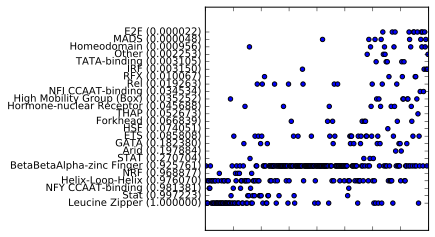

In [18]:
import matplotlib.pyplot as plt
data.loc[:, 'indx'] = range(len(data))
sorted_families = families_mww_df.sort('mww_corrected').index
ypos = -1
labels = ['{0} ({1:f})'.format(fam, families_mww_df.loc[fam].mww_pval)
          for fam in sorted_families]
fig = plt.figure()
axes = fig.add_subplot(111)
for family in sorted_families:
    xpos = list(data[data.TF_family == family]['indx'])
    axes.scatter(xpos, [ypos] * len(xpos))
    ypos -= 0.3
axes.set_xlim(0, len(data))
plt.yticks(np.arange(-1, -1 - 0.3 * len(sorted_families), -0.3), labels)
axes.set_aspect(1./axes.get_data_ratio())
axes.tick_params(axis="x", labelbottom='off')
savefig("AUROC_improvement_TFFM_TFFM+DNAshape_families.svg")

In [19]:
%%R -i data -i families_list -o families_mww
data = as.data.frame(data)
families_mww = data.frame(row.names=families_list)
for(family in families_list){
    inside = data[data['TF_family'] == family, 'TFFM_AUPRC_improvement'];
    outside = data[data['TF_family'] != family, 'TFFM_AUPRC_improvement'];
    mww = wilcox.test(inside, outside, alternative='g', exact=TRUE);
    families_mww[family, 'mww_pval'] = mww$p.value;
    families_mww[family, 'mww_corrected'] = mww$p.value * length(families_list);
    families_mww[family, 'family'] = family
}

In [20]:
families_mww_df = pd.DataFrame(families_mww[['mww_pval', 'mww_corrected']])
families_mww_df.index = families_list
families_mww_df.sort('mww_corrected')

,mww_pval,mww_corrected
E2F,0.000002,0.000052
MADS,0.002014,0.048329
High Mobility Group (Box),0.003295,0.079087
Homeodomain,0.004720,0.113291
TATA-binding,0.004765,0.114356
IRF,0.007332,0.175971
Other,0.010439,0.250544
NFI CCAAT-binding,0.010486,0.251667
RFX,0.017272,0.414534
Arid,0.036451,0.874824


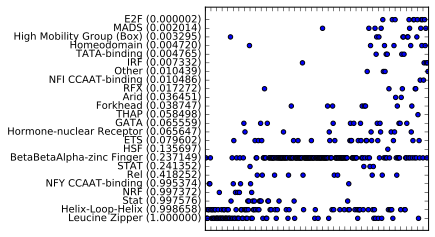

In [21]:
import matplotlib.pyplot as plt
data.loc[:, 'indx'] = range(len(data))
sorted_families = families_mww_df.sort('mww_corrected').index
ypos = -1
labels = ['{0} ({1:f})'.format(fam, families_mww_df.loc[fam].mww_pval)
          for fam in sorted_families]
fig = plt.figure()
axes = fig.add_subplot(111)
plt.yticks(np.arange(-1, -1 - 0.3 * len(sorted_families), -0.3), labels)
plt.xticks(range(0, len(data), 10), [])
for family in sorted_families:
    xpos = list(data[data.TF_family == family]['indx'])
    axes.scatter(xpos, [ypos] * len(xpos))
    ypos -= 0.3
axes.set_xlim(0, len(data))
axes.set_aspect(1./axes.get_data_ratio())
savefig("AUPRC_improvement_TFFM_TFFM+DNAshape_families.svg")

## PSSM analyses

### Results on all the ChIP-seq experiments

In [22]:
print "PSSM-based classifiers have higher AUROC in {0:d} over {1:d} cases".format(
    len(data[data["PSSM_dnashape_AUROC"] > data["PSSM_AUROC"]]), len(data.dropna()))
print "PSSM-based classifiers have higher AUPRC in {0:d} over {1:d} cases".format(
    len(data[data["PSSM_dnashape_AUPRC"] > data["PSSM_AUPRC"]]), len(data.dropna()))

PSSM-based classifiers have higher AUROC in 400 over 400 cases
PSSM-based classifiers have higher AUPRC in 400 over 400 cases


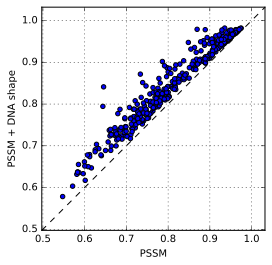

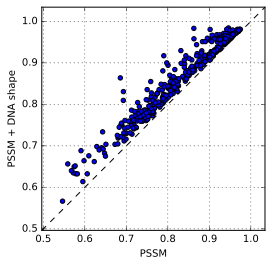

In [23]:
mini = min(min(data.dropna()["PSSM_AUROC"]), min(data.dropna()["PSSM_dnashape_AUROC"])) - 0.05
maxi = max(max(data["PSSM_AUROC"]), max(data["PSSM_dnashape_AUROC"])) + 0.05
axes = data.dropna().plot(x="PSSM_AUROC", y="PSSM_dnashape_AUROC", kind="scatter")
axes.set_xlabel("PSSM")
axes.set_ylabel("PSSM + DNA shape")
axes.plot((mini, maxi), (mini, maxi), 'k--')
axes.set_xlim(mini, maxi)
axes.set_ylim(mini, maxi)
axes.set_aspect('equal')
savefig("AUROC_PSSM_PSSM+DNAshape.svg")
mini = min(min(data["PSSM_AUPRC"]), min(data["PSSM_dnashape_AUPRC"])) - 0.05
maxi = max(max(data["PSSM_AUPRC"]), max(data["PSSM_dnashape_AUPRC"])) + 0.05
axes = data.dropna().plot(x="PSSM_AUPRC", y="PSSM_dnashape_AUPRC", kind="scatter")
axes.set_xlabel("PSSM")
axes.set_ylabel("PSSM + DNA shape")
axes.plot((mini, maxi), (mini, maxi), 'k--')
axes.set_xlim(mini, maxi)
axes.set_ylim(mini, maxi)
axes.set_aspect('equal')
savefig("AUPRC_PSSM_PSSM+DNAshape.svg")

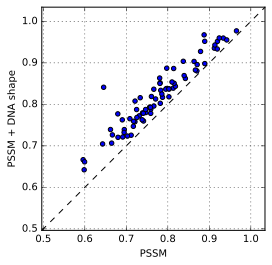

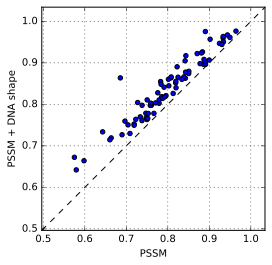

In [24]:
tf_dico = {'TF_name': [], 'PSSM_dnashape_AUROC': [], 'PSSM_AUROC': [],
          'PSSM_dnashape_AUPRC': [], 'PSSM_AUPRC': []}
for tf in list(set(data.TF_name)):
    tf_dico['TF_name'].append(tf)
    tf_dico['PSSM_dnashape_AUROC'].append(
        data.dropna().loc[data.TF_name == tf].PSSM_dnashape_AUROC.median())
    tf_dico['PSSM_AUROC'].append(
        data.dropna().loc[data.TF_name == tf].PSSM_AUROC.median())
    tf_dico['PSSM_dnashape_AUPRC'].append(
        data.dropna().loc[data.TF_name == tf].PSSM_dnashape_AUPRC.median())
    tf_dico['PSSM_AUPRC'].append(
        data.dropna().loc[data.TF_name == tf].PSSM_AUPRC.median())
data_pssm = pd.DataFrame(tf_dico)
axes = data_pssm.dropna().plot(x='PSSM_AUROC', y='PSSM_dnashape_AUROC', kind='scatter')
axes.set_xlabel("PSSM")
axes.set_ylabel("PSSM + DNA shape")
axes.plot((mini, maxi), (mini, maxi), 'k--')
axes.set_xlim(mini, maxi)
axes.set_ylim(mini, maxi)
axes.set_aspect('equal')
savefig('AUROC_PSSM_PSSM+DNAshape_perTF.svg')

axes = data_pssm.dropna().plot(x='PSSM_AUPRC', y='PSSM_dnashape_AUPRC', kind='scatter')
axes.set_xlabel("PSSM")
axes.set_ylabel("PSSM + DNA shape")
axes.plot((mini, maxi), (mini, maxi), 'k--')
axes.set_xlim(mini, maxi)
axes.set_ylim(mini, maxi)
axes.set_aspect('equal')
savefig('AUPRC_PSSM_PSSM+DNAshape_perTF.svg')

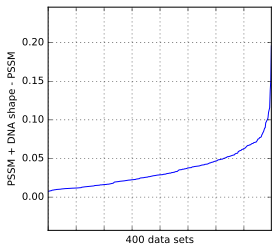

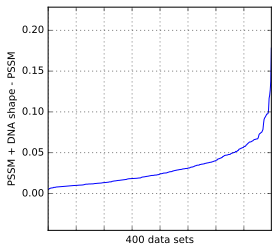

In [25]:
data = data.sort("PSSM_AUROC_improvement")
axes = data.dropna().plot(y="PSSM_AUROC_improvement", use_index=False, legend=False)
axes.tick_params(axis="x", labelbottom='off')
axes.set_xlabel("{0:d} data sets".format(len(data.dropna())))
axes.set_ylabel("PSSM + DNA shape - PSSM")
axes.set_ylim(min(data.PSSM_AUROC_improvement) - 0.05,
              max(data.PSSM_AUROC_improvement) + 0.05)
axes.set_aspect(1./axes.get_data_ratio())
savefig("AUROC_improvement_PSSM_PSSM+DNAshape.svg")

data = data.sort("PSSM_AUPRC_improvement")
axes = data.dropna().plot(y="PSSM_AUPRC_improvement", use_index=False, legend=False)
axes.tick_params(axis="x", labelbottom='off')
axes.set_xlabel("{0:d} data sets".format(len(data.dropna())))
axes.set_ylabel("PSSM + DNA shape - PSSM")
axes.set_ylim(min(data.PSSM_AUPRC_improvement) - 0.05,
              max(data.PSSM_AUPRC_improvement) + 0.05)
axes.set_aspect(1./axes.get_data_ratio())
savefig("AUPRC_improvement_PSSM_PSSM+DNAshape.svg")

In [26]:
print 'AUROC difference is > 0.05 for {0:d} data-sets.'.format(
    len(data[data.PSSM_AUROC_improvement > 0.05]))
print 'AUPRC difference is > 0.05 for {0:d} data-sets.'.format(
    len(data[data.PSSM_AUPRC_improvement > 0.05]))

AUROC difference is > 0.05 for 86 data-sets.
AUPRC difference is > 0.05 for 69 data-sets.


In [27]:
%%R -i data -i families_list -o families_mww
data = as.data.frame(data)
families_mww = data.frame(row.names=families_list)
for(family in families_list){
    inside = data[data['TF_family'] == family, 'PSSM_AUROC_improvement'];
    outside = data[data['TF_family'] != family, 'PSSM_AUROC_improvement'];
    mww = wilcox.test(inside, outside, alternative='g', exact=TRUE);
    families_mww[family, 'mww_pval'] = mww$p.value;
    families_mww[family, 'mww_corrected'] = mww$p.value * length(families_list);
    families_mww[family, 'family'] = family
}

In [28]:
families_mww_df = pd.DataFrame(families_mww[['mww_pval', 'mww_corrected']])
families_mww_df.index = families_list
families_mww_df.sort('mww_corrected')

,mww_pval,mww_corrected
MADS,0.000000,0.000009
Other,0.001069,0.025649
Rel,0.001612,0.038687
E2F,0.002012,0.048291
NRF,0.002201,0.052834
HSF,0.002500,0.060000
TATA-binding,0.002799,0.067171
NFY CCAAT-binding,0.003650,0.087604
IRF,0.004425,0.106191
Homeodomain,0.006295,0.151078


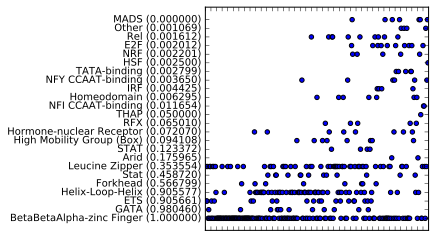

In [29]:
import matplotlib.pyplot as plt
data.loc[:, 'indx'] = range(len(data))
sorted_families = families_mww_df.sort('mww_corrected').index
ypos = -1
labels = ['{0} ({1:f})'.format(fam, families_mww_df.loc[fam].mww_pval)
          for fam in sorted_families]
fig = plt.figure()
axes = fig.add_subplot(111)
plt.yticks(np.arange(-1, -1 - 0.3 * len(sorted_families), -0.3), labels)
plt.xticks(range(0, len(data), 10), [])
for family in sorted_families:
    xpos = list(data[data.TF_family == family]['indx'])
    axes.scatter(xpos, [ypos] * len(xpos))
    ypos -= 0.3
plt.xlim(0, len(data))
axes.set_aspect(1./axes.get_data_ratio())
savefig("AUROC_improvement_PSSM_PSSM+DNAshape_families.svg")

In [30]:
%%R -i data -i families_list -o families_mww
data = as.data.frame(data)
families_mww = data.frame(row.names=families_list)
for(family in families_list){
    inside = data[data['TF_family'] == family, 'PSSM_AUPRC_improvement'];
    outside = data[data['TF_family'] != family, 'PSSM_AUPRC_improvement'];
    mww = wilcox.test(inside, outside, alternative='g', exact=TRUE);
    families_mww[family, 'mww_pval'] = mww$p.value;
    families_mww[family, 'mww_corrected'] = mww$p.value * length(families_list);
    families_mww[family, 'family'] = family
}

In [31]:
families_mww_df = pd.DataFrame(families_mww[['mww_pval', 'mww_corrected']])
families_mww_df.index = families_list
families_mww_df.sort('mww_corrected')

,mww_pval,mww_corrected
E2F,0.000033,0.000786
MADS,0.000086,0.002068
TATA-binding,0.000332,0.007978
Other,0.000509,0.012212
NFI CCAAT-binding,0.000802,0.019248
HSF,0.002500,0.060000
NFY CCAAT-binding,0.006561,0.157460
NRF,0.009090,0.218162
IRF,0.011444,0.274660
Homeodomain,0.016060,0.385448


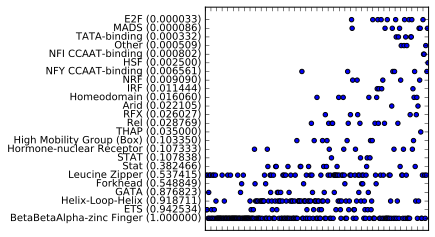

In [32]:
import matplotlib.pyplot as plt
data.loc[:, 'indx'] = range(len(data))
sorted_families = families_mww_df.sort('mww_corrected').index
ypos = -1
labels = ['{0} ({1:f})'.format(fam, families_mww_df.loc[fam].mww_pval)
          for fam in sorted_families]
fig = plt.figure()
axes = fig.add_subplot(111)
plt.yticks(np.arange(-1, -1 - 0.3 * len(sorted_families), -0.3), labels)
plt.xticks(range(0, len(data), 10), [])
for family in sorted_families:
    xpos = list(data[data.TF_family == family]['indx'])
    axes.scatter(xpos, [ypos] * len(xpos))
    ypos -= 0.3
plt.xlim(0, len(data))
axes.set_aspect(1./axes.get_data_ratio())
savefig("AUPRC_improvement_PSSM_PSSM+DNAshape_families.svg")

# Results considering TFBS flanking sequences

## TFFM results on all ChIP-seq experiments

In [33]:
import os
for repo in os.listdir('./'):
    if repo.startswith('wgEncodeAwgTfbs'):
        res_file = '{0}/predictions_results_extension_15bp.txt'.format(repo)
        if os.path.isfile(res_file):
            with open(res_file) as stream:
                first_line = stream.readline()
                assert first_line.startswith('ROC AUC TFFM')
                ext_tffm_dnashape_auc = eval(first_line.split(' ')[-1])
                data.loc[repo, "ext_TFFM_dnashape_AUROC"] = ext_tffm_dnashape_auc
                data.loc[repo, "ext_TFFM_dnashape_AUROC_improvement"] = ext_tffm_dnashape_auc - data["TFFM_dnashape_AUROC"][repo]
                second_line = stream.readline()
                assert second_line.startswith('PR AUC TFFM')
                ext_tffm_dnashape_auprc = eval(second_line.split(' ')[-1])
                data.loc[repo, "ext_TFFM_dnashape_AUPRC"] = ext_tffm_dnashape_auprc
                data.loc[repo, "ext_TFFM_dnashape_AUPRC_improvement"] = ext_tffm_dnashape_auprc - data["TFFM_dnashape_AUPRC"][repo]
                third_line = stream.readline()
                assert third_line.startswith('ROC AUC PWM')
                ext_pwm_dnashape_auc = eval(third_line.split(' ')[-1])
                data.loc[repo, "ext_PSSM_dnashape_AUROC"] = ext_pwm_dnashape_auc
                data.loc[repo, "ext_PSSM_dnashape_AUROC_improvement"] = ext_pwm_dnashape_auc - data["PSSM_dnashape_AUROC"][repo]
                fourth_line = stream.readline()
                assert fourth_line.startswith('PR AUC PWM')
                ext_pwm_dnashape_auprc = eval(fourth_line.split(' ')[-1])
                data.loc[repo, 'ext_PSSM_dnashape_AUPRC'] = ext_pwm_dnashape_auprc
                data.loc[repo, 'ext_PSSM_dnashape_AUPRC_improvement'] = ext_pwm_dnashape_auprc - data['PSSM_dnashape_AUPRC'][repo]

In [34]:
print "TFFM-based classifier using the 15bp extension is superior in {0:d} over {1:d} cases".format(
    len(data[data["ext_TFFM_dnashape_AUROC"] > data["TFFM_dnashape_AUROC"]]), len(data.dropna()))
print "TFFM-based classifier using the 15bp extension is superior in {0:d} over {1:d} cases".format(
    len(data[data["ext_TFFM_dnashape_AUPRC"] > data["TFFM_dnashape_AUPRC"]]), len(data.dropna()))

TFFM-based classifier using the 15bp extension is superior in 384 over 400 cases
TFFM-based classifier using the 15bp extension is superior in 373 over 400 cases


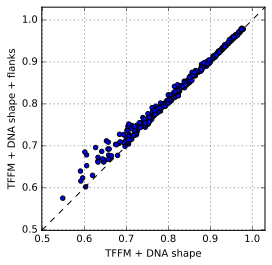

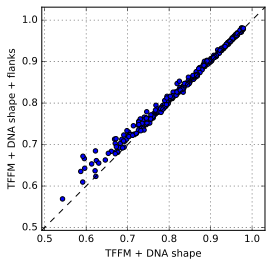

In [35]:
mini = min(min(data["ext_TFFM_dnashape_AUROC"]), min(data["TFFM_dnashape_AUROC"])) - 0.05
maxi = max(max(data["ext_TFFM_dnashape_AUROC"]), max(data["TFFM_dnashape_AUROC"])) + 0.05
axes = data.dropna().plot(y="ext_TFFM_dnashape_AUROC", x="TFFM_dnashape_AUROC", kind="scatter")
axes.set_ylabel("TFFM + DNA shape + flanks")
axes.set_xlabel("TFFM + DNA shape")
axes.plot((mini, maxi), (mini, maxi), 'k--')
axes.set_ylim(mini, maxi)
axes.set_xlim(mini, maxi)
axes.set_aspect('equal')
savefig("AUROC_ext_TFFM+DNAshape_TFFM+DNAshape.svg")

mini = min(min(data["ext_TFFM_dnashape_AUPRC"]), min(data["TFFM_dnashape_AUPRC"])) - 0.05
maxi = max(max(data["ext_TFFM_dnashape_AUPRC"]), max(data["TFFM_dnashape_AUPRC"])) + 0.05
axes = data.dropna().plot(y="ext_TFFM_dnashape_AUPRC", x="TFFM_dnashape_AUPRC", kind="scatter")
axes.set_ylabel("TFFM + DNA shape + flanks")
axes.set_xlabel("TFFM + DNA shape")
axes.plot((mini, maxi), (mini, maxi), 'k--')
axes.set_ylim(mini, maxi)
axes.set_xlim(mini, maxi)
axes.set_aspect('equal')
savefig("AUPRC_ext_TFFM+DNAshape_TFFM+DNAshape.svg")

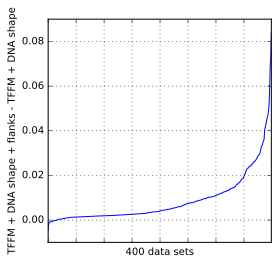

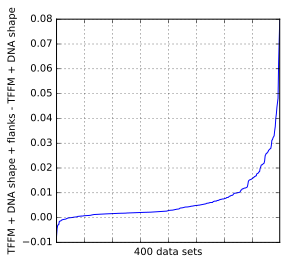

In [36]:
data = data.sort("ext_TFFM_dnashape_AUROC_improvement")
axes = data.dropna().plot(y="ext_TFFM_dnashape_AUROC_improvement", use_index=False, legend=False)
axes.tick_params(axis="x", labelbottom='off')
axes.set_xlabel("{0:d} data sets".format(len(data.dropna())))
axes.set_ylabel("TFFM + DNA shape + flanks - TFFM + DNA shape")
axes.set_aspect(1./axes.get_data_ratio())
savefig("AUROC_improvement_ext_TFFM+DNAshape_TFFM+DNAshape.svg")

data = data.sort("ext_TFFM_dnashape_AUPRC_improvement")
axes = data.dropna().plot(y="ext_TFFM_dnashape_AUPRC_improvement", use_index=False, legend=False)
axes.tick_params(axis="x", labelbottom='off')
axes.set_xlabel("{0:d} data sets".format(len(data.dropna())))
axes.set_ylabel("TFFM + DNA shape + flanks - TFFM + DNA shape")
axes.set_aspect(1./axes.get_data_ratio())
savefig("AUPRC_improvement_ext_TFFM+DNAshape_TFFM+DNAshape.svg")

In [37]:
print 'AUROC difference is > 0.05 for {0:d} data-sets'.format(
    len(data[data.ext_TFFM_dnashape_AUROC_improvement > 0.05]))
print 'AUPRC difference is > 0.05 for {0:d} data-sets'.format(
    len(data[data.ext_TFFM_dnashape_AUPRC_improvement > 0.05]))

AUROC difference is > 0.05 for 5 data-sets
AUPRC difference is > 0.05 for 3 data-sets


## PSSM results on all ChIP-seq experiments

In [38]:
print "PSSM-based classifiers using the 15bp extension is superior in {0:d} over {1:d} cases".format(
    len(data[data["ext_PSSM_dnashape_AUROC"] > data["PSSM_dnashape_AUROC"]]), len(data.dropna()))
print "PSSM-based classifiers using the 15bp extension is superior in {0:d} over {1:d} cases".format(
    len(data[data["ext_PSSM_dnashape_AUPRC"] > data["PSSM_dnashape_AUPRC"]]), len(data.dropna()))

PSSM-based classifiers using the 15bp extension is superior in 388 over 400 cases
PSSM-based classifiers using the 15bp extension is superior in 378 over 400 cases


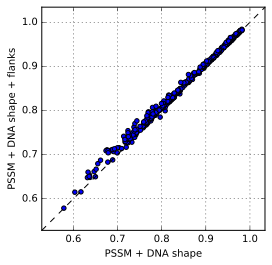

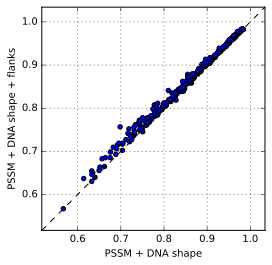

In [39]:
mini = min(min(data["ext_PSSM_dnashape_AUROC"]), min(data["PSSM_dnashape_AUROC"])) - 0.05
maxi = max(max(data["ext_PSSM_dnashape_AUROC"]), max(data["PSSM_dnashape_AUROC"])) + 0.05
axes = data.dropna().plot(y="ext_PSSM_dnashape_AUROC", x="PSSM_dnashape_AUROC", kind="scatter")
axes.set_ylabel("PSSM + DNA shape + flanks")
axes.set_xlabel("PSSM + DNA shape")
axes.plot((mini, maxi), (mini, maxi), 'k--')
axes.set_ylim(mini, maxi)
axes.set_xlim(mini, maxi)
axes.set_aspect('equal')
savefig("AUROC_ext_PSSM+DNAshape_PSSM+DNAshape.svg")

mini = min(min(data["ext_PSSM_dnashape_AUPRC"]), min(data["PSSM_dnashape_AUPRC"])) - 0.05
maxi = max(max(data["ext_PSSM_dnashape_AUPRC"]), max(data["PSSM_dnashape_AUPRC"])) + 0.05
axes = data.dropna().plot(y="ext_PSSM_dnashape_AUPRC", x="PSSM_dnashape_AUPRC", kind="scatter")
axes.set_ylabel("PSSM + DNA shape + flanks")
axes.set_xlabel("PSSM + DNA shape")
axes.plot((mini, maxi), (mini, maxi), 'k--')
axes.set_ylim(mini, maxi)
axes.set_xlim(mini, maxi)
axes.set_aspect('equal')
savefig("AUPRC_ext_PSSM+DNAshape_PSSM+DNAshape.svg")

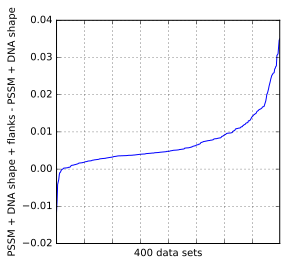

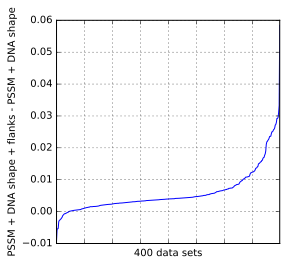

In [40]:
data = data.sort("ext_PSSM_dnashape_AUROC_improvement")
axes = data.dropna().plot(y="ext_PSSM_dnashape_AUROC_improvement", use_index=False, legend=False)
axes.tick_params(axis="x", labelbottom='off')
axes.set_xlabel("{0:d} data sets".format(len(data.dropna())))
axes.set_ylabel("PSSM + DNA shape + flanks - PSSM + DNA shape")
axes.set_aspect(1./axes.get_data_ratio())
savefig("AUROC_improvement_ext_PSSM+DNAshape_PSSM+DNAshape.svg")

data = data.sort("ext_PSSM_dnashape_AUPRC_improvement")
axes = data.dropna().plot(y="ext_PSSM_dnashape_AUPRC_improvement", use_index=False, legend=False)
axes.tick_params(axis="x", labelbottom='off')
axes.set_xlabel("{0:d} data sets".format(len(data.dropna())))
axes.set_ylabel("PSSM + DNA shape + flanks - PSSM + DNA shape")
axes.set_aspect(1./axes.get_data_ratio())
savefig("AUPRC_improvement_ext_PSSM+DNAshape_PSSM+DNAshape.svg")

In [41]:
print 'AUPRC improvement > 0.05 for {0:d} data-sets.'.format(
    len(data[data.ext_PSSM_dnashape_AUPRC_improvement > 0.05]))

AUPRC improvement > 0.05 for 1 data-sets.
